# Lab Sheet 1

# Exercise 1

## 1. Read the csv file from the given URL to a dataframe. https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.


In [76]:
from pandas import read_csv
path='imports-85.data'
data=read_csv(path, )
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## 2. Include the following headers to the above csv file ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

In [77]:
import pandas as pd
head = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path, names = head)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 3. Display the first five rows of the dataset.

In [78]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 4. Replace the “?” in the above file with NaN.

In [79]:
import numpy as np
df.replace("?", np.nan, inplace = True)

## 5. Find the missing values in the dataset. 

In [80]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 6. Count the missing values in each column. 

In [81]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## 7. Identify the column(s) of a given Data Frame which have at least one missing value. 

In [82]:
df.columns[df.isnull().any()]


Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

## 8. Find the Indexes of missing values of column “normalized-losses” in the given DataFrame. 


In [83]:
df[df["normalized-losses"].isnull()].index

Index([  0,   1,   2,   5,   7,   9,  14,  15,  16,  17,  43,  44,  45,  46,
        48,  49,  63,  66,  71,  73,  74,  75,  82,  83,  84, 109, 110, 113,
       114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191, 192, 193],
      dtype='int64')

## 9. Replace the missing values in “normalized-losses” ,"stroke", “bore",with the mean. 

In [84]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"], errors='coerce')
df["bore"] = pd.to_numeric(df["bore"], errors='coerce')

mean_normalized_losses = df["normalized-losses"].mean()
mean_stroke = df["stroke"].mean()
mean_bore = df["bore"].mean()

df["normalized-losses"].fillna(mean_normalized_losses, inplace=True)
df["stroke"].fillna(mean_stroke, inplace=True)
df["bore"].fillna(mean_bore, inplace=True)

print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

## 11.Replace the missing values in “num_doors" with the maximum frequency value 

In [85]:
max_freq = df['num-of-doors'].mode()[0]
df['num-of-doors'].fillna(max_freq, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 12. Replace the missing values in “horse_power”,peak_rpm with the values in the next row. 

In [86]:
df[['horsepower', 'peak-rpm']] = df[['horsepower', 'peak-rpm']].fillna(method='bfill')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 13. Drop the rows of “price”, if value is missing. 

In [87]:
df.dropna(subset=["price"], axis=0, inplace=True)

In [88]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 14. List the datatypes of each column. 

In [89]:
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


## 15. Convert the columns to appropriate datatype. 

In [90]:
df[["symboling", "normalized-losses"]] = df[["symboling", "normalized-losses"]].astype("int")
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["num-of-doors", "num-of-cylinders"]] = df[["num-of-doors", "num-of-cylinders"]].replace({"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "three": 3, "twelve": 12})
df[["num-of-doors", "num-of-cylinders"]] = df[["num-of-doors", "num-of-cylinders"]].astype("int")
print(df.dtypes)


symboling              int32
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors           int32
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int32
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


## 16. Normalize the columns "length", "width" and "height" so their value ranges from 0 to 1. 


In [91]:
df['length']=(df['length']-df['length'].min())/(df['length'].max()-df['length'].min())
df['width']=(df['width']-df['width'].min())/(df['width'].max()-df['width'].min())
df['height']=(df['height']-df['height'].min())/(df['height'].max()-df['height'].min())


In [92]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


# Exercise 3

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [95]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [96]:
data.shape


(398, 8)

In [97]:
data.isnull().any()


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [98]:
data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [99]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [100]:
data = data[data.horsepower != '?']


In [101]:
print('?' in data.horsepower)


False


In [102]:
data.shape


(392, 8)

In [103]:
data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [104]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [105]:
data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [106]:
data.mpg.describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Density'>

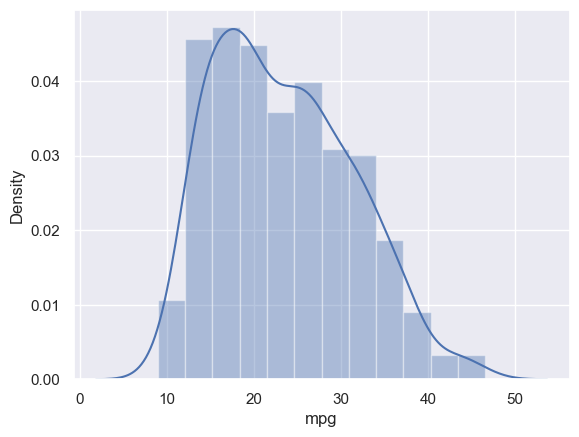

In [107]:
sns.distplot(data['mpg'])


In [108]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [109]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

data_scale = data.copy()

data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [110]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


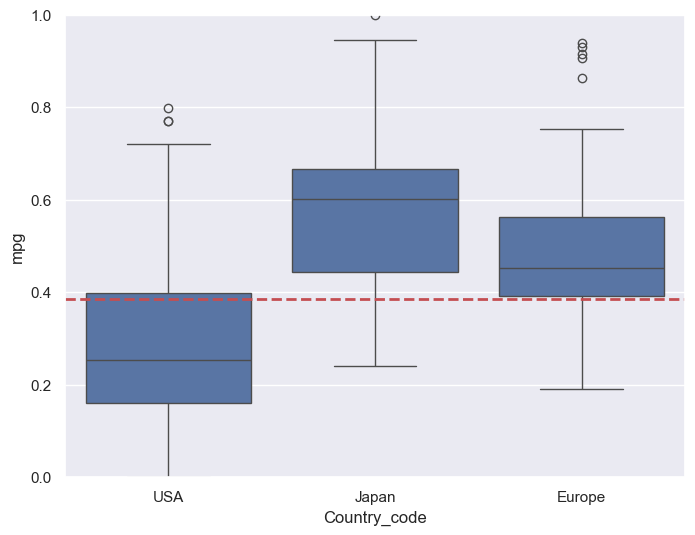

In [111]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

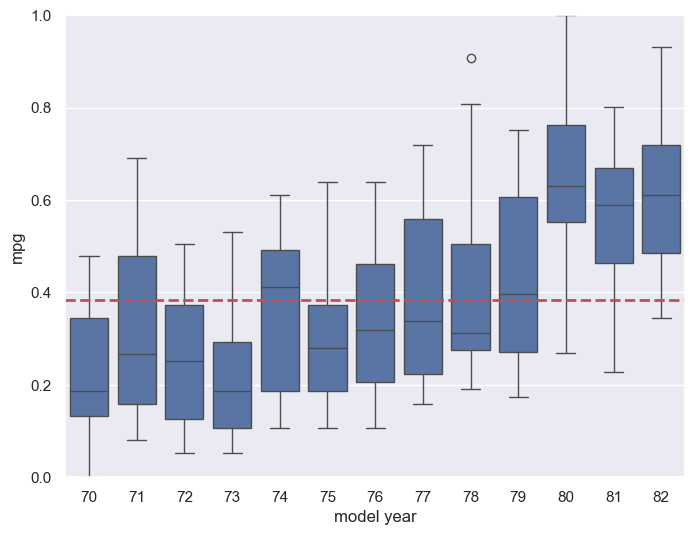

In [112]:
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

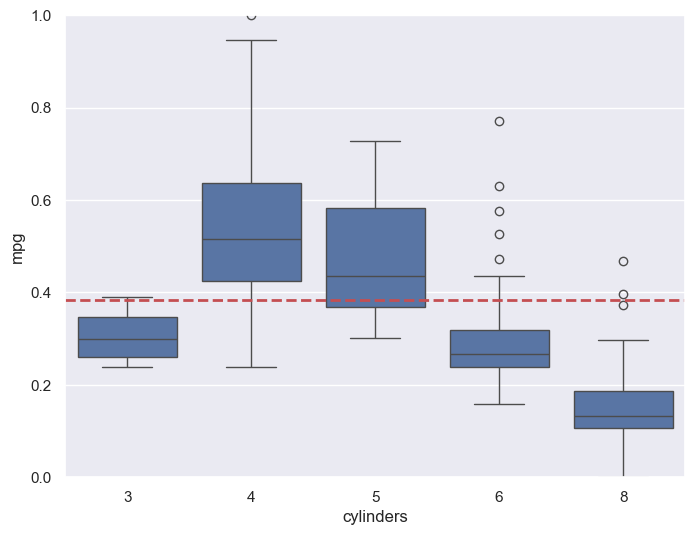

In [113]:
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [114]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

ValueError: could not convert string to float: 'USA'

<Axes: >

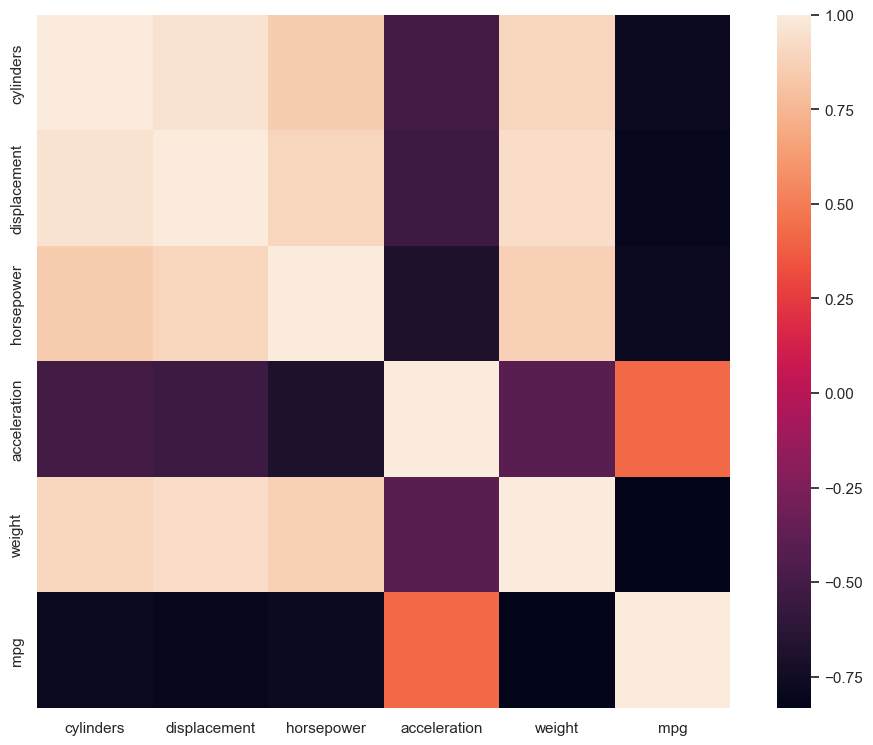

In [115]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

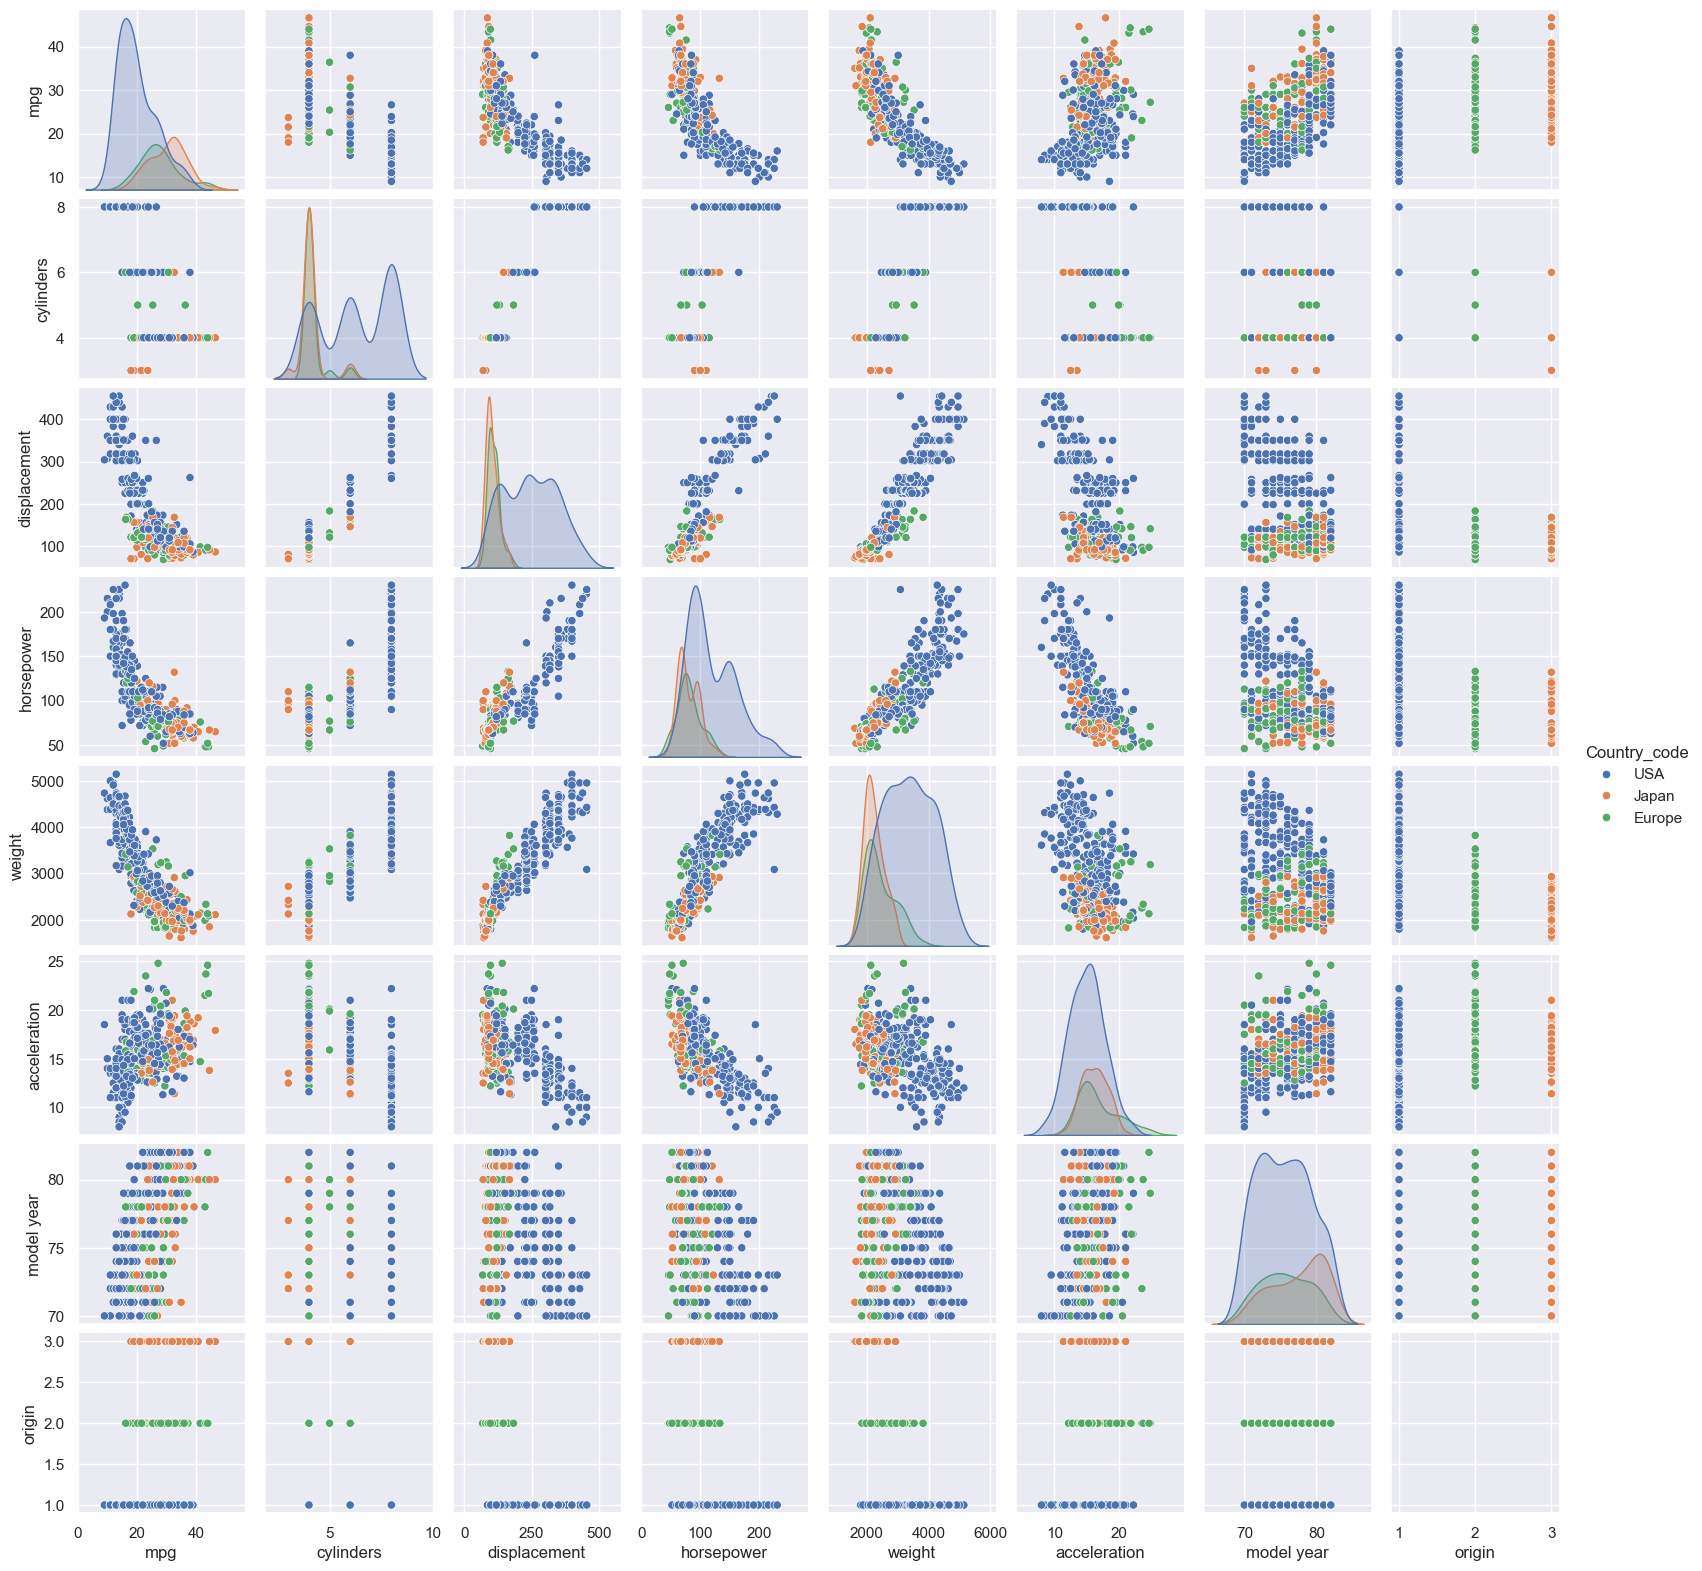

In [116]:
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()

In [117]:
data.index


Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)

In [118]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru', 'subaru dl', 'subaru dl', 'subaru'], dtype='object', name='car name')

In [119]:
data['Company_Name'] = data.index.str.extract('(^.*?)\s')

In [120]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)

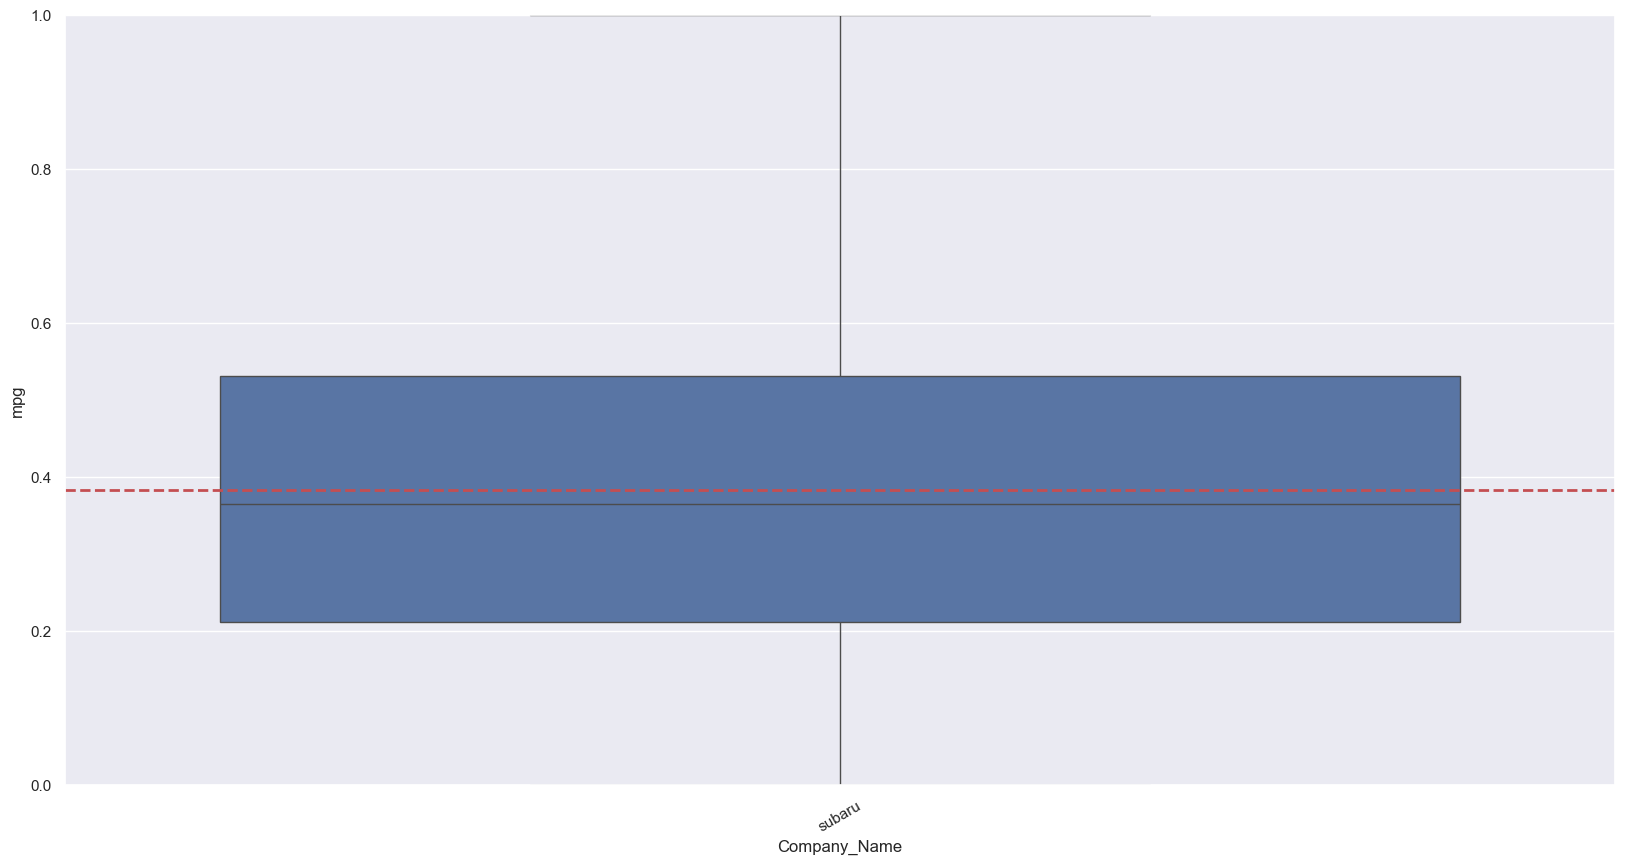

In [121]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [122]:
data.Company_Name.isnull().any()


False

In [123]:
var='mpg'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,subaru


In [124]:
data[data[var]== data[var].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,subaru


In [125]:
var='displacement'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,subaru


In [126]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,subaru


In [127]:
var='horsepower'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,subaru
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,subaru


In [128]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru


In [129]:
var='weight'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,subaru


In [130]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,subaru


In [131]:
var='acceleration'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,subaru


In [132]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,subaru


In [133]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [134]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [135]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [136]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [137]:
data['Power_to_weight'] = ((data.horsepower*0.7457)/data.weight)

data.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,subaru,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679


In [138]:
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,subaru,0.027666
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,subaru,0.033317
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,subaru,0.032554
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,subaru,0.032582
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,subaru,0.030269


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [140]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [141]:
regressor = LinearRegression()

regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [142]:
regressor.fit(X_train,y_train)

LinearRegression()

In [143]:
y_predicted = regressor.predict(X_test)


In [144]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [145]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

In [146]:
gb_regressor.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [147]:
y_predicted_gbr = gb_regressor.predict(X_test)
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.678422792051918

<Axes: >

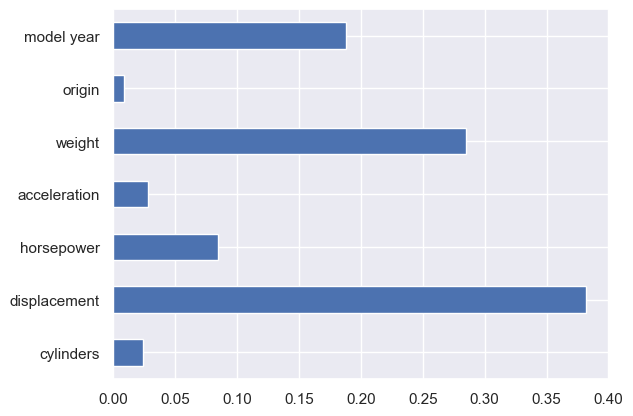

In [148]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data[factors])

PCA(n_components=2)

In [150]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [151]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

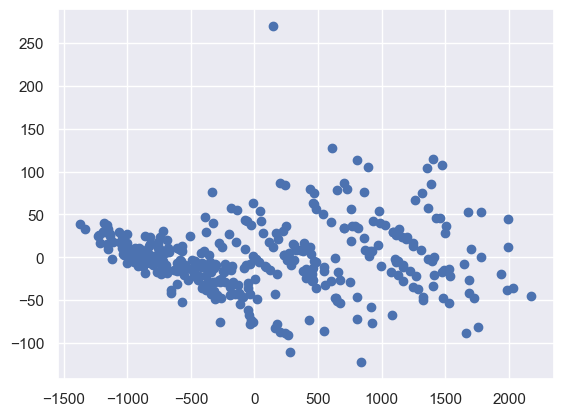

In [152]:
transformed_data = pca.transform(data[factors])
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
plt.scatter(pc1,pc2)

In [153]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])
factors

['cylinders',
 'displacement',
 'horsepower',
 'acceleration',
 'weight',
 'origin',
 'model year']

In [154]:
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [155]:
data[(data['model year'] == 70 )&( data.displacement>400)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,subaru,0.034013
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,subaru,0.037181
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369


In [156]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)
grid = grid.fit(X_train, y_train)
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=55)

In [157]:
gb_regressor_t = grid.best_estimator_
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=55)

In [158]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.6762648633586865

In [159]:
data.duplicated().any()

False